# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении
Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Открываю файл с данными и изучаю общую информацию

#### Подключаю нужные библиотеки

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

#### Открываю таблицу и изучаю общую информацию о данных

In [30]:
real_estate_data = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')
print(real_estate_data.info())
real_estate_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Таблица содержит 23699 записей, 22 столбца. В некоторых столбцах имеются пропущенные значения. 

### Шаг 2. Предобработка данных

### Обработка пропусков

#### Определяю пропущенные значения

In [31]:
print(real_estate_data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Пропущенные значения есть в 14 столбцах из 22. 

- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony  
- locality_name — название населённого пункта
- airports_nearest 
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Рассмотрю их поподробнее. 

В столбцах ceiling_height, floors_total, living_area, kitchen_area данные пропущенные скорее всего потому, что владельцы просто не знают эту информацию о своих квартирах. 

В столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest  пропущены данные, вероятно, потому что система автоматически не смогла определить эти значения.

В столбце is_apartment данные пропущенные, вероятно, потому что недвижимость не является апартаментами.

В столбце balcony данные пропущенные, потому что скорее всего их нет.

Возможно, в locality_name забыли указать название населенного пункта.

В столбце days_exposition есть пропущенные значения может быть потому, что объявление еще актуально и квартира не продана.

#### Заполняю пропущенные значения

Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [32]:
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(value=0)
print(real_estate_data['balcony'].isnull().sum())

0


В столбце is_apartment данные пропущенные, вероятно, потому что недвижимость не является апартаментами.

In [33]:
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(value=False)
print(real_estate_data['is_apartment'].isnull().sum())

0


В столбце ceiling_height заменю значения на медианные.

In [34]:
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(value=real_estate_data['ceiling_height'].median())
print(real_estate_data['ceiling_height'].isnull().sum())

0


In [35]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Приведение данных к нужному типу

In [36]:
real_estate_data.loc[real_estate_data['floors_total'].notnull(), 'floors_total'] = real_estate_data.loc[real_estate_data['floors_total'].notnull(), 'floors_total'].apply(int)
real_estate_data['floors_total'] = real_estate_data['floors_total'].astype('Int32')

real_estate_data.loc[real_estate_data['balcony'].notnull(), 'balcony'] = real_estate_data.loc[real_estate_data['balcony'].notnull(), 'balcony'].apply(int)
real_estate_data['balcony'] = real_estate_data['balcony'].astype('Int32')

real_estate_data.loc[real_estate_data['days_exposition'].notnull(), 'days_exposition'] = real_estate_data.loc[real_estate_data['days_exposition'].notnull(), 'days_exposition'].apply(int)
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].astype('Int32')

/var/folders/_5/vmwv7xc55vd180gfqstp9x940000gn/T/ipykernel_2434/2797757555.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  real_estate_data.loc[real_estate_data['balcony'].notnull(), 'balcony'] = real_estate_data.loc[real_estate_data['balcony'].notnull(), 'balcony'].apply(int)


В столбцах:
- floors_total
- balcony
- days_exposition

тип данных заменен на целочисленный, потому что количество этажей, число балконов и количество дней от публикации до снятия объявления - величины в целых числах.

### Шаг 3. Обработка данных

Добавляю в таблицу: 
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [38]:
#Определяю цену квадратного метра
real_estate_data['price_m²'] = real_estate_data['last_price'] / real_estate_data['total_area']

#Добавляю в таблицу день недели, месяц и год публикации объявления
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d %H:%M')
real_estate_data['weekday_exposition'] = real_estate_data['first_day_exposition'].dt.weekday
real_estate_data['M_exposition'] = real_estate_data['first_day_exposition'].dt.month
real_estate_data['Y_exposition'] = real_estate_data['first_day_exposition'].dt.year

In [45]:
#Добавляю в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей
real_estate_data['living_to_total'] = real_estate_data['living_area'] / real_estate_data['total_area']
real_estate_data['kitchen_to_total'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

In [46]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m²,weekday_exposition,M_exposition,Y_exposition,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,<NA>,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,0.320000,0.410000


### Шаг 4. Исследовательский анализ данных

### Изучаю параметры: площадь, цена, число комнат, высота потолков

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

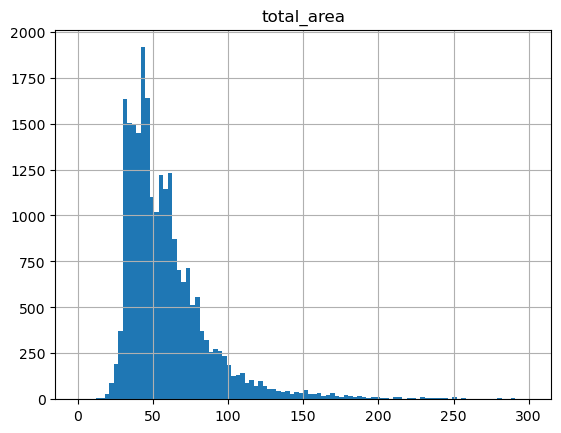

In [47]:
#Строю гистограмму для параметра "Площадь"
real_estate_data.hist('total_area', bins = 100, range = (0, 300))

Чаще всего в объявлениях встречаются квартиры площадью около 45 м².

array([[<Axes: title={'center': 'price_m²'}>]], dtype=object)

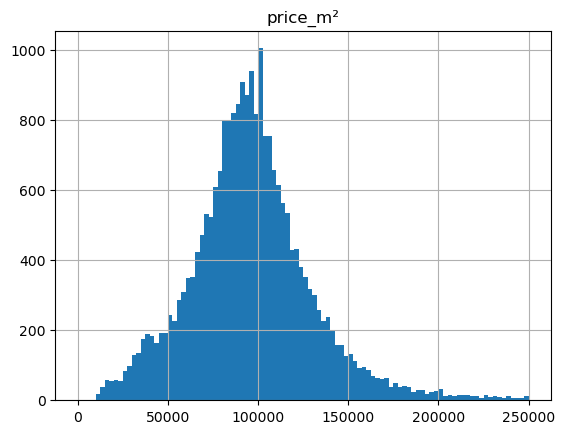

In [48]:
#Строю гистограмму для параметра "Цена"
real_estate_data.hist('price_m²', bins = 100, range = (0, 250000))

Наиболее часто встречающаяся цена в объявлениях - около 100000.

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

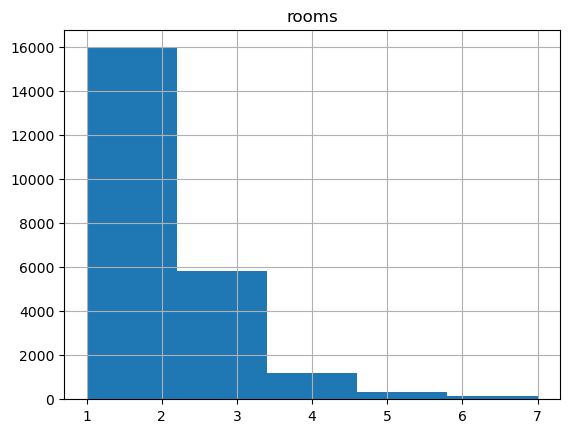

In [49]:
#Строю гистограмму для параметра "Число комнат"
real_estate_data.hist('rooms', bins = 5, range = (1, 7))

Чаще всего продают квартиры с одной или двумя комнатами.

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

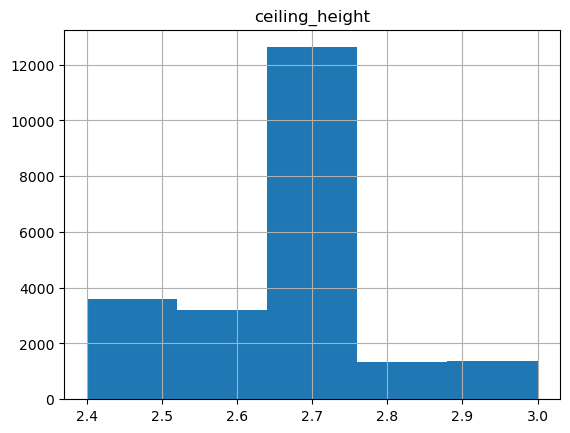

In [50]:
#Строю гистограмму для параметра "Высота потолков"
real_estate_data.hist('ceiling_height', bins = 5, range = (2.4, 3))

По гистограмме распределния высоты потолков видно, что самые часто встречающиеся объвяления о квартирах с типовыми параметрами, стандартной высотой потолков. 

### Изучаю время продажи квартир

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

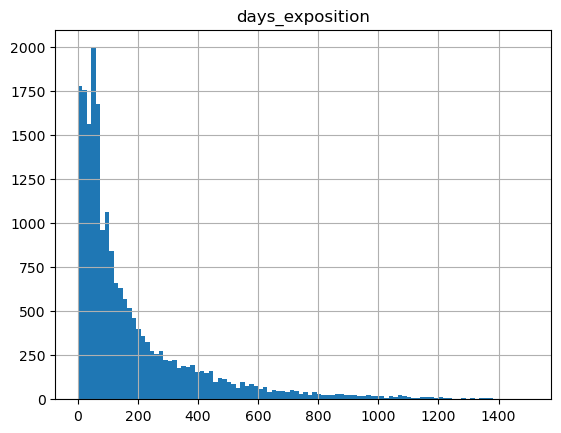

In [51]:
real_estate_data.hist('days_exposition', bins=100, range=(0, 1500))

Большинство квартир продается в первый месяц после публикации объявления.

In [52]:
days_exposition_mean = real_estate_data['days_exposition'].mean()
days_exposition_median = real_estate_data['days_exposition'].median()
print('Среднее значение:', days_exposition_mean)
print('Значение медианы:', days_exposition_median)

Среднее значение: 180.88863436982163
Значение медианы: 95.0


(-5.0, 600.0)

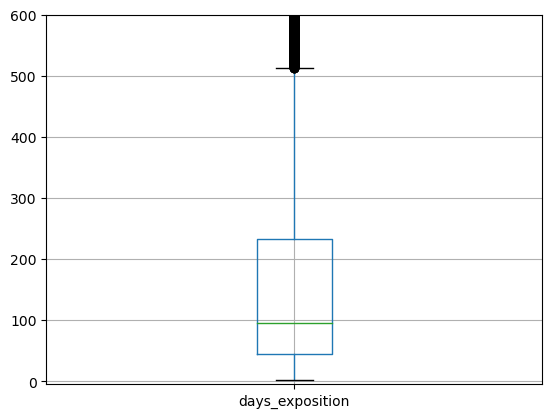

In [53]:
real_estate_data.boxplot('days_exposition')
plt.ylim(-5, 600)

Можно считать, что продажи прошли быстро, если они были совершены в первый месяц-полтора после размещения объявления.
Необычайно долго - если продавались более полутора лет. 

### Убираю редкие и выбивающиеся значения

#### Убираю выбивающиеся значения из столбца "Rooms"

In [54]:
real_estate_data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

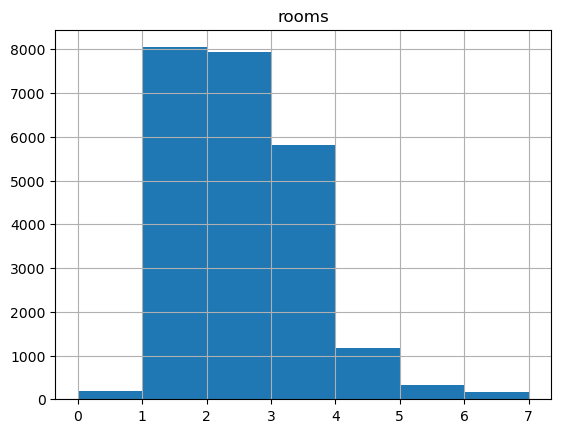

In [55]:
real_estate_data.hist('rooms', bins = 7, range = (0, 7))

По гистограмме "Комнаты" замечаю, что есть записи в которых количество комнат указано 0. По всей видимости, по таким объвлениям сдается место в комнате. Количество таких записей - меньше процента. Удалю эти данные из всей таблицы. 

In [56]:
real_estate_data.drop(real_estate_data[real_estate_data['rooms'] == 0].index , inplace=True)

#### Убираю выбивающиеся значения по столбцу "Days_exposition"

In [57]:
real_estate_data.drop(real_estate_data[real_estate_data['days_exposition'] > 500].index , inplace=True)

### Какие факторы больше всего влияют на стоимость квартиры?

<Axes: title={'center': 'Влияние площади на стоимость квартиры'}, xlabel='total_area'>

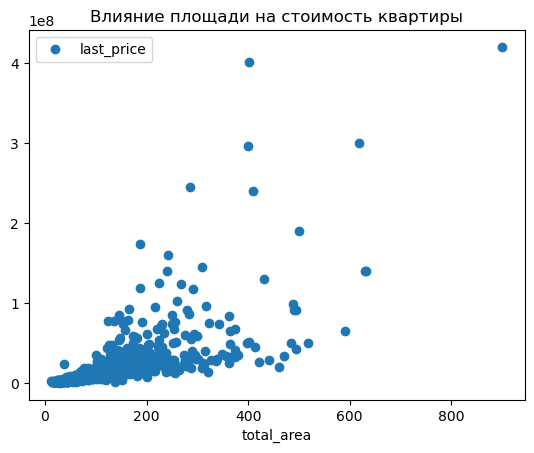

In [58]:
#Проверяю наличие зависимости между стоимостью и площадью квартиры
price_to_area = real_estate_data.pivot_table(index = 'total_area', values = 'last_price')
price_to_area.sort_values('total_area').plot(title='Влияние площади на стоимость квартиры', style='o')

In [59]:
real_estate_data['total_area'].corr(real_estate_data['last_price'])

0.6421029650798135

Корреляция в 0,64 говорит о наличии связи между параметрами, однако не слишком сильной. Выходит, увеличение площади квартиры сопровождается увеличения стоимости квартиры, но так бывает не всегда.

<Axes: title={'center': 'Влияние количества комнат на стоимость квартиры'}, xlabel='rooms'>

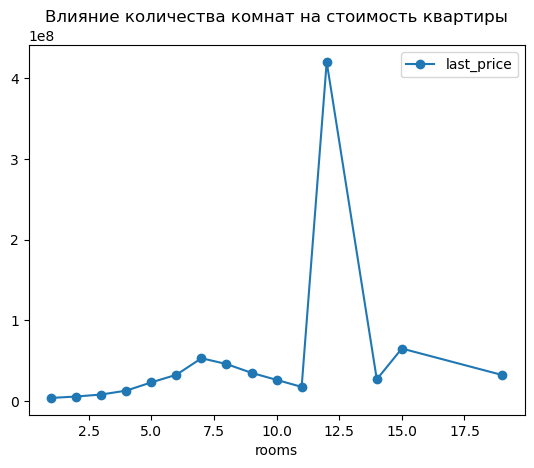

In [60]:
#Проверяю наличие зависимости между стоимостью и числом комнат в квартире
price_to_rooms = real_estate_data.pivot_table(index = 'rooms', values = 'last_price')
price_to_rooms.sort_values('rooms').plot(title='Влияние количества комнат на стоимость квартиры', style='o-')

In [61]:
real_estate_data['rooms'].corr(real_estate_data['last_price'])

0.3565012854778091

In [62]:
real_estate_data.loc[real_estate_data['rooms'] == 12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m²,weekday_exposition,M_exposition,Y_exposition,living_to_total,kitchen_to_total
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,NaN,2.0,318.0,106,466666.666667,2,12,2017,0.455222,0.124444


Корреляция в 0,35 говорит о слабой связи между параметрами. Запись с количеством комнат одна единственная в выборке, похоже на выброс, рассмотрю отдельно промежуток от 1 до 10.

<Axes: title={'center': 'Влияние количества комнат на стоимость квартиры'}, xlabel='rooms'>

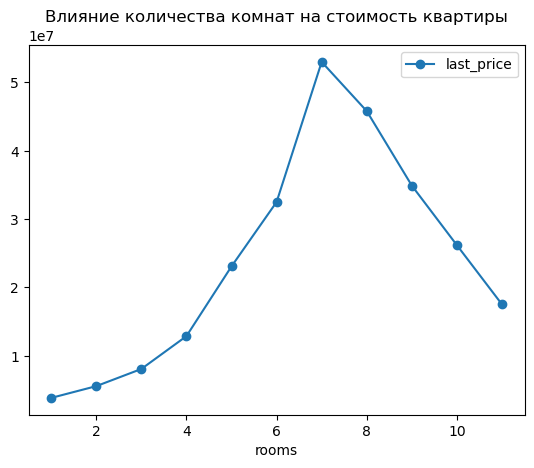

In [63]:
#Рассмотрю распределение для числа комнат от 1 до 10
small_area = real_estate_data.loc[real_estate_data['rooms'] <= 11]

price_to_rooms = small_area.pivot_table(index = 'rooms', values = 'last_price')
price_to_rooms.sort_values('rooms').plot(title='Влияние количества комнат на стоимость квартиры', style='o-')

In [64]:
small_area['rooms'].corr(small_area['last_price'])

0.35140023106652674

Здесь значение корреляции также небольшое, это говорит о том, что связь между параметрами слабая. Другими словами, увеличение количества комнат в квартире не обязательно сопровождается увеличением стоимости квартиры.

<Axes: title={'center': 'Зависимость между стоимостью квартиры и ее удаленностью от центра'}, xlabel='cityCenters_nearest'>

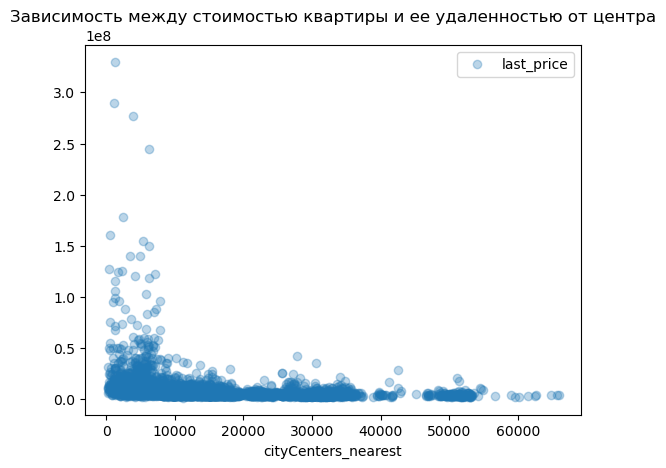

In [65]:
#Проверяю наличие зависимости между стоимостью квартиры и ее удаленностью от центра
price_to_center = real_estate_data.pivot_table(index = 'cityCenters_nearest', values = 'last_price')
price_to_center.sort_values('cityCenters_nearest').plot(
    title='Зависимость между стоимостью квартиры и ее удаленностью от центра', style='o', alpha=0.3)

In [66]:
small_area['cityCenters_nearest'].corr(small_area['last_price'])

-0.20497495292568563

Получили отрицательный коэффициент корреляции Пирсона. Это значит, что когда значения одной переменной убывают, значения другой возрастают.

<Axes: title={'center': 'Зависимость между стоимостью квартиры и ее удаленностью от центра'}, xlabel='cityCenters_nearest'>

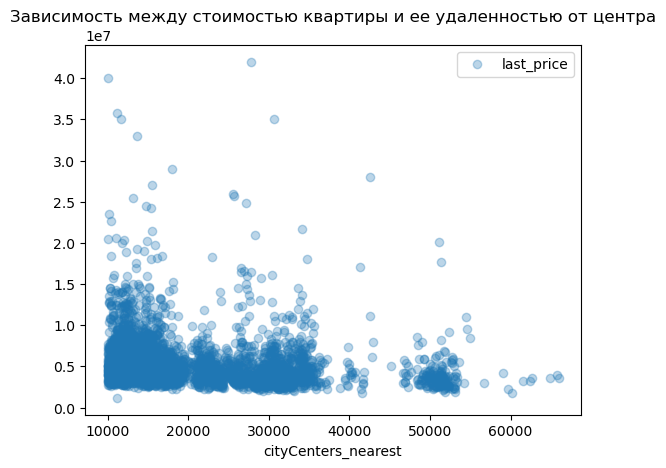

In [67]:
#Проверяю наличие зависимости между стоимостью квартиры и ее удаленностью от центра
far_from_center = real_estate_data.loc[real_estate_data['cityCenters_nearest'] > 10000]
price_to_center = far_from_center.pivot_table(index = 'cityCenters_nearest', values = 'last_price')
price_to_center.sort_values('cityCenters_nearest').plot(
    title='Зависимость между стоимостью квартиры и ее удаленностью от центра', style='o', alpha=0.3)

In [68]:
far_from_center['cityCenters_nearest'].corr(small_area['last_price'])

-0.14146503208353425

Зависимости между стоимостью квартиры и удаленностью ее от центра практически нет.

In [ ]:
#Проверяю зависит ли стоимость квартиры от даты размещения
price_to_weekday = real_estate_data.groupby('weekday_exposition')['last_price'].median()
price_to_weekday.plot()

Выше всего цены для объявлений, размещенных вначале недели, и меньше всего - в выходные дни. Это может быть обусловлено тем, что в рабочие дни объявления размещают агенства недвижимости, а по выходным - собственники жилья.

<Axes: xlabel='M_exposition'>

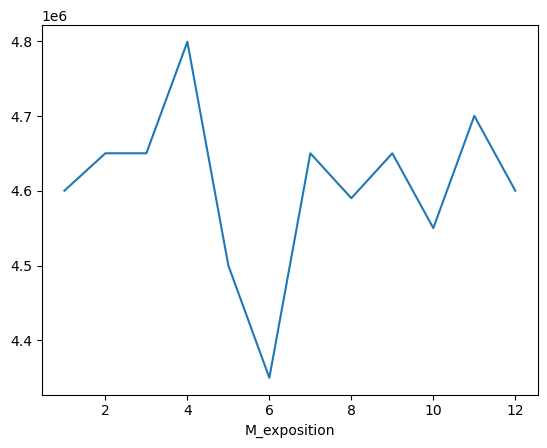

In [70]:
price_to_M = real_estate_data.groupby('M_exposition')['last_price'].median()
price_to_M.plot()

В целом в течение года стоимость квартир не зависит от месяца размещения объявления. Стоимость квартир немного повышается весной, в апреле. А летом, в июне стоимость квартир резко снижается. 

In [71]:
price_to_Y = real_estate_data.groupby('Y_exposition')['last_price'].median()
price_to_Y

Y_exposition
2014    17525000.0
2015     5058500.0
2016     4500000.0
2017     4500000.0
2018     4600000.0
2019     5100000.0
Name: last_price, dtype: float64

Наибольшая стоимость квартир в объявлениях, размещенных в 2014 году.

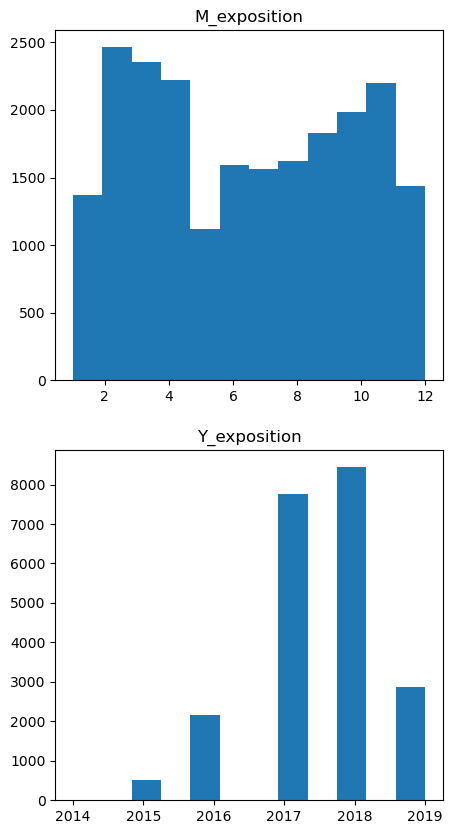

In [72]:
#Построю гистограммы распределения по этим же параметрам:
names = ['M_exposition', 'Y_exposition']
fig = plt.figure(figsize=(5, 10))
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    ax.hist(real_estate_data[names[i]], bins = 12)
    ax.set_title(names[i])

### Выбираю 10 населённых пунктов с наибольшим числом объявлений

In [73]:
#Нахожу топ-10 населенных пунктов с наибольшим числом объявлений
top10_city = real_estate_data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
top10_city.columns = ['count']
top10_city.sort_values(by=['count'], ascending=False).head(10)

,count
locality_name,
Санкт-Петербург,14400
посёлок Мурино,464
посёлок Шушары,413
Всеволожск,361
Пушкин,340
Колпино,323
посёлок Парголово,308
Гатчина,283
деревня Кудрово,251


In [74]:
 city_mean_price = real_estate_data.pivot_table(index='locality_name', values='price_m²', aggfunc='mean')

In [75]:
city_mean_price_full = top10_city.join(city_mean_price)
city_mean_price_full.columns = ['count', 'price_m²']
city_mean_price_full.sort_values(by=['count'], ascending=False).head(10)

,count,price_m²
locality_name,,
Санкт-Петербург,14400,114301.394383
посёлок Мурино,464,85253.924345
посёлок Шушары,413,78360.943926
Всеволожск,361,68651.949834
Пушкин,340,103068.288604
Колпино,323,75372.668102
посёлок Парголово,308,90030.914515
Гатчина,283,68933.495667
деревня Кудрово,251,92426.553757


In [76]:
city_mean_price_full.sort_values(by=['price_m²']).head(1)

,count,price_m²
locality_name,,
деревня Старополье,3,11206.221198


In [77]:
city_mean_price_full.sort_values(by=['price_m²'], ascending=False).head(1)

,count,price_m²
locality_name,,
посёлок Лисий Нос,1,168706.69746


Населенный пункт с самой высокой стоимостью жилья: поселок Лисий Нос.
С самой низкой - деревня Ставрополье.

### Изучаю предложения квартир

Так как в столбце 'cityCenters_nearest' есть пропущенные значения, таких записей всего 60 относительно общего числа записей для Санкт-Петербурга - 14400, удалю строки с пропущенными значениями в колонке расстояния до центра.

<Axes: title={'center': 'Зависимость цены квартиры от ее удаленности от центра'}, xlabel='km_to_center'>

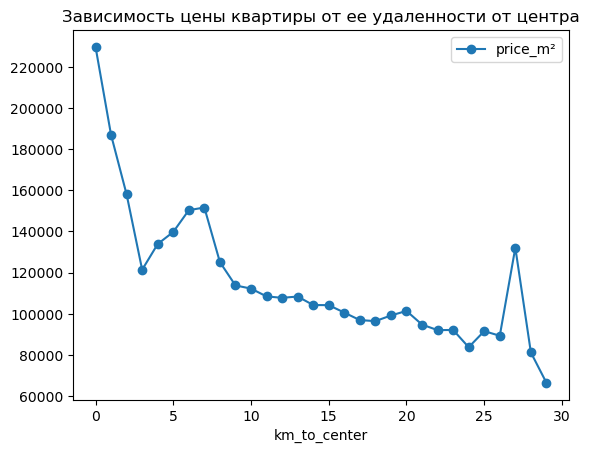

In [78]:
real_estate_data.dropna(subset = ['cityCenters_nearest'], inplace=True)
real_estate_data['km_to_center'] = real_estate_data['cityCenters_nearest'] / 1000
real_estate_data['km_to_center'] = real_estate_data['km_to_center'].round()
SP = real_estate_data.query('locality_name == "Санкт-Петербург"')

data_selection = SP.pivot_table(index='km_to_center', values=['price_m²'], aggfunc='mean')
data_selection.plot(title = 'Зависимость цены квартиры от ее удаленности от центра', style='o-')

### Выделяю сегмент квартир в центре

По графику видно, что при удаленности от центра 7 км цена на квартиры начинает резко снижаться. Центральная облать - до 7 км.

In [79]:
real_estate_data['price_m²'] = real_estate_data['price_m²'].round()
center_data = real_estate_data.query('km_to_center <= 7')

data_pivot = center_data.pivot_table(index=['rooms'], columns='km_to_center', values=['price_m²'], aggfunc='median')
data_pivot

price_m²                                                    \
km_to_center       0.0       1.0       2.0       3.0       4.0       5.0   
rooms                                                                      
1             186483.5  239583.0  137564.5  124455.5  143725.0  147285.0   
2             292479.0  131812.0  131034.0  116487.0  126010.0  130289.0   
3             109900.0  129612.5  123622.0  104167.0  110432.0  121020.0   
4             525676.5  114442.0  103004.0  109854.0   96854.0  107650.5   
5             132944.0  190476.0  113333.0   94559.0  104151.0   95608.0   
6                  NaN  104201.5   88581.0   86328.0   99642.0  113208.0   
7             188889.0  140845.0   96712.0  102553.0  123584.0  103306.0   
8                  NaN  116056.0  111841.0       NaN       NaN  107333.0   
9                  NaN       NaN       NaN  220000.0       NaN   72340.0   
10                 NaN       NaN       NaN       NaN       NaN  104828.5   
11                 NaN       NaN       NaN   95264.0       NaN       NaN   
14                 NaN       NaN  116785.0       NaN       NaN       NaN   
15                 NaN       NaN       NaN       NaN       NaN  110169.0   
19                 NaN       NaN       NaN       NaN   86092.0       NaN   

                                  
km_to_center       6.0       7.0  
rooms                             
1             144011.5  137662.0  
2             127282.0  119718.0  
3             119183.0  114737.0  
4             120800.0  183376.0  
5              89865.5  177249.0  
6             151020.0  100000.0  
7             101211.5  202335.0  
8             373400.5       NaN  
9                  NaN       NaN  
10                 NaN       NaN  
11                 NaN       NaN  
14                 NaN       NaN  
15                 NaN       NaN  
19                 NaN       NaN

На однокомнатные квартиры наибольная цена на квартиры, расположенные в самом центре, при удалении уже на 2 км цена меняется незначительно. Между количеством комнат и стоимостью квартиры зависимость нелинейная. В самом центре города квартира с 4 комнатами дороже, чем с 7-ю.

In [80]:
data_pivot = center_data.pivot_table(index=['floor'], columns='km_to_center', values=['price_m²'], aggfunc='median')
data_pivot

price_m²                                                      \
km_to_center       0.0        1.0        2.0       3.0       4.0       5.0   
floor                                                                        
1              90000.0   116264.0   111280.0  105237.0  112215.0  107500.0   
2              88796.0   126503.5   127935.0  109079.0  111039.0  114337.0   
3             137755.0   133206.0   113398.5  114029.0  110990.5  122105.0   
4             454282.5   129777.0   116883.0  109745.0  115193.5  119454.5   
5             257561.0   116327.5   129310.0  117581.0  119856.5  123223.0   
6             101322.0  1021302.5   155556.0  124101.5  132090.0  136338.5   
7                  NaN        NaN   178082.0   96845.0  140144.5  145910.0   
8                  NaN        NaN   547843.0       NaN  147519.0  150803.5   
9                  NaN        NaN  1000748.0  157258.0  157738.0  162857.0   
10                 NaN        NaN        NaN  163862.0  143009.0  144390.0   
11                 NaN        NaN        NaN       NaN  163750.0  179778.0   
12                 NaN        NaN        NaN       NaN  161192.0  145711.0   
13                 NaN        NaN        NaN       NaN  134349.0  238402.0   
14                 NaN        NaN        NaN       NaN  143068.5  170450.0   
15                 NaN        NaN        NaN       NaN  122087.0  138393.0   
16                 NaN        NaN        NaN       NaN  134963.0  146149.0   
17                 NaN        NaN        NaN       NaN  146800.0  138474.0   
18                 NaN        NaN        NaN       NaN  108827.0  171840.0   
19                 NaN        NaN        NaN       NaN  169468.0  154298.0   
20                 NaN        NaN        NaN       NaN       NaN       NaN   
21                 NaN        NaN        NaN       NaN       NaN       NaN   
23                 NaN        NaN        NaN       NaN  174875.0       NaN   
25                 NaN        NaN        NaN       NaN  154232.0       NaN   

                                  
km_to_center       6.0       7.0  
floor                             
1             114773.0  100662.0  
2             124453.5  113392.5  
3             120000.0  113687.0  
4             115465.5  132474.5  
5             132196.0  118649.0  
6             142857.0  130587.5  
7             148529.0  180645.0  
8             150104.0  132950.5  
9             148580.0  125000.0  
10            145116.0  137500.0  
11            113071.5  162060.0  
12            154000.0  131250.0  
13            172000.0  137662.0  
14             80435.0  125439.0  
15            199597.0  137310.0  
16             89655.0  140415.0  
17                 NaN  124390.0  
18                 NaN  119242.0  
19                 NaN       NaN  
20                 NaN  137931.0  
21                 NaN  164865.0  
23                 NaN       NaN  
25                 NaN       NaN

В центре города расположены квартиры в домах малой этажности. Чем дальше от центра, тем этажей в домах больше. Наибольшая стоимость квартир как правило расположенных на предпоследнем этаже.

In [81]:
center_data_pivot = center_data.pivot_table(index='km_to_center', values=['rooms', 'floor', 'total_area', 'ceiling_height', 'last_price', 'Y_exposition'], aggfunc='median')
center_data_pivot 

,Y_exposition,ceiling_height,floor,last_price,rooms,total_area
km_to_center,,,,,,
0.0,2017,3.20,3,13700000.0,3,103.00
1.0,2017,3.00,3,11945000.0,3,90.55
2.0,2017,3.00,3,10000000.0,3,86.40
3.0,2018,3.00,3,8300000.0,3,78.10
4.0,2017,2.85,3,9000000.0,3,80.00
5.0,2017,2.85,4,9400000.0,3,79.90
6.0,2018,2.65,4,8620522.0,2,71.15
7.0,2017,2.65,4,7500000.0,2,67.00


In [82]:
center_data_pivot = center_data.pivot_table(index='km_to_center', values=['rooms', 'floor', 'total_area', 'ceiling_height', 'last_price', 'Y_exposition'], aggfunc='median').mean()
center_data_pivot 

Y_exposition      2.017250e+03
ceiling_height    2.900000e+00
floor             3.375000e+00
last_price        9.808190e+06
rooms             2.750000e+00
total_area        8.201250e+01
dtype: float64

In [83]:
all_data_pivot = real_estate_data.pivot_table(index='km_to_center', values=['rooms', 'floor', 'total_area', 'ceiling_height', 'last_price', 'Y_exposition'], aggfunc='median').mean()
all_data_pivot 

Y_exposition      2.017615e+03
ceiling_height    2.665164e+00
floor             3.934426e+00
last_price        5.077884e+06
rooms             2.073770e+00
total_area        5.584631e+01
dtype: float64

Для сегмента квартир в центральной части города Санкт-Петербург можно отметить, что наиболее дорогие, конечно, расположены в самом центре города. Цена постепенно снижается при удалении от центра города.
Средняя высота потолков в домах в центре города выше, чем на окраине. Цены на квартиры существенно ниже при удалении от центра города. Количество комнат, в целом, не коррелирует с удаленностью от центра. По площади квартиры больше в центре.

### Шаг 5. Общий вывод

В этом проекте нужно было научиться определять рыночную стоимость объектов недвижимости. 
Входные данные - данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Таблица содержала 23699 записей, 22 столбца. В некоторых столбцах имелись пропущенные значения. 
Была проведена предобработка данных: обработка пропусков, замена некорректных значений, замена типа данных. Посчитала и добавила в таблицу дополнительные параметры. Выделила топ-10 городов с наибольшим количеством объявлений.

Для квартир, расположенных в центральной части города проанализировала взаимосвзяь параметров.
Для сегмента квартир в центральной части города Санкт-Петербург можно отметить, что наиболее дорогие, конечно, расположены в самом центре города. Цена постепенно снижается при удалении от центра города.
Средняя высота потолков в домах в центре города выше, чем на окраине. Цены на квартиры существенно ниже при удалении от центра города. Количество комнат, в целом, не коррелирует с удаленностью от центра. По площади квартиры больше в центре.